In [1]:
#将数据库数据导入为dataframe
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

connect = sqlite3.connect('D:\sqlite\db\chinook.db')
print("连接成功")
employees_data = pd.read_sql("SELECT *  from employees", con=connect)
employees_data.head()
#查看读取的结果

连接成功


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [2]:
customers_data = pd.read_sql("SELECT *  from customers", con=connect)
customers_data.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [3]:
invoices_data = pd.read_sql("SELECT *  from invoices", con=connect)
invoices_data.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


In [4]:
#画图
# 1、找出维护客户数量最多的员工ID为3
employees_customers_data=pd.read_sql("select SupportRepId as EmployeeId,count(customers.CustomerId) as CustomerNum from customers group by customers.SupportRepId order by count(customers.CustomerId) DESC", con=connect)
employees_customers_data.head()


,EmployeeId,CustomerNum
0,3,21
1,4,20
2,5,18


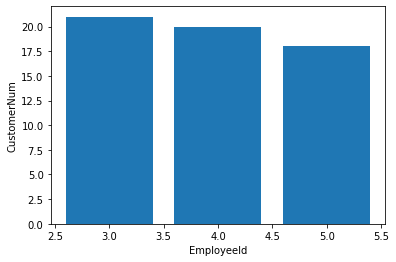

In [5]:
#表1的直方图展示
plt.bar(employees_customers_data["EmployeeId"],employees_customers_data["CustomerNum"])
plt.xlabel('EmployeeId')
plt.ylabel('CustomerNum')
plt.show()

In [6]:
# 2、invoice表
#2.1每个客户对应的员工以及开出的发票总额
customers_invoices_data=pd.read_sql("select customers.CustomerId,customers.SupportRepId,SUM(invoices.Total) from invoices left join customers on customers.CustomerId=invoices.CustomerId group by invoices.CustomerId order by SUM(Total) DESC", con=connect)
customers_invoices_data.head()

,CustomerId,SupportRepId,SUM(invoices.Total)
0,6,5,49.62
1,26,4,47.62
2,57,5,46.62
3,45,3,45.62
4,46,3,45.62


In [7]:
#2.2员工对应的顾客所能开出的发票总额
employee_customers_total_data=pd.read_sql("select customers.SupportRepId,SUM(invoices.Total) as InvoicesTotal from invoices left join customers on customers.CustomerId=invoices.CustomerId group by customers.SupportRepId order by SUM(Total) DESC", con=connect)
employee_customers_total_data.head()

,SupportRepId,InvoicesTotal
0,3,833.04
1,4,775.40
2,5,720.16


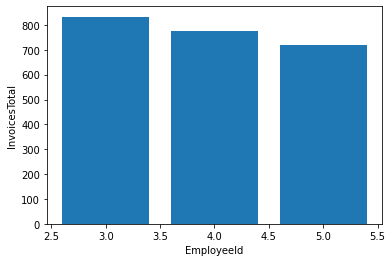

In [8]:
#表2.2的直方图展示
plt.bar(employee_customers_total_data["SupportRepId"],employee_customers_total_data["InvoicesTotal"])
plt.xlabel('EmployeeId')
plt.ylabel('InvoicesTotal')
plt.show()

In [9]:
# 3、员工出生日期及雇佣年限展示，可以看出最年轻的员工销售额最高，雇佣年限最长，可作为晋升候选人
# employee_birthdate_hiredate=pd.read_sql("select employees.EmployeeId,employees.BirthDate,employees.HireDate,SUM(invoices.Total) from invoices left join customers on customers.CustomerId=invoices.CustomerId left join employees on employees.EmployeeId=customers.SupportRepId group by customers.SupportRepId order by employees.BirthDate DESC",con=connect)
employee_birthdate_hiredate=pd.read_sql("select employees.EmployeeId,employees.BirthDate,2021-employees.BirthDate as age,employees.HireDate,SUM(invoices.Total) from invoices left join customers on customers.CustomerId=invoices.CustomerId left join employees on employees.EmployeeId=customers.SupportRepId group by customers.SupportRepId order by age ASC",con=connect)
employee_birthdate_hiredate.head()

,EmployeeId,BirthDate,age,HireDate,SUM(invoices.Total)
0,3,1973-08-29 00:00:00,48,2002-04-01 00:00:00,833.04
1,5,1965-03-03 00:00:00,56,2003-10-17 00:00:00,720.16
2,4,1947-09-19 00:00:00,74,2003-05-03 00:00:00,775.40


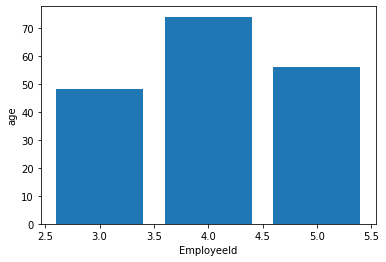

In [10]:
#表3的直方图展示
plt.bar(employee_birthdate_hiredate["EmployeeId"],employee_birthdate_hiredate["age"])
plt.xlabel('EmployeeId')
plt.ylabel('age')
plt.show()